In [131]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [132]:
def exp_decay(epoch, initial_lrate):
  return math.exp(-0.05 * (epoch + 10)) * initial_lrate

In [133]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 70
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), lr_scheduling_func=exp_decay, max_epochs=1000, initial_lr=0.04, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [137]:
def research_minibatch_view(results):

    # График n_epochs
    plt.plot(range(1, len(results)+1), results, marker='o', label='Minibatch GD with exp_decay')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

In [135]:
results = research_minibatch_calculation(n_tests=10)

100%|██████████| 70/70 [00:10<00:00,  6.45it/s]


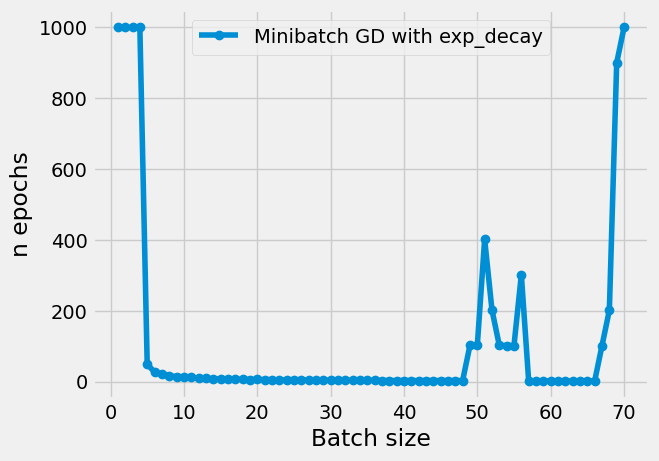

In [138]:
research_minibatch_view(results)